In [1]:
library(psych)

# Download data

In [2]:
path_ = 'G:/VPHI/Welfare/2- Research Projects/OFHE2.OriginsE2/DataOutput/TrackingSystem/ALLDATA_'
path_adapt = file.path(path_,'Adaptability')
path_model = file.path(path_adapt,'repeatability_model')
df = read.csv(file.path(path_adapt,'df_MVT_4individuality.csv'), header = TRUE, sep = ";")
df$HenID = as.factor(df$HenID)   
df$PenID = as.factor(df$PenID) 
df$CLASS = as.factor(df$CLASS) 
df$Treatment = as.factor(df$Treatment) 
print(dim(df))
summary(df)

[1] 3230   25


     HenID           DIB         CLASS          PenID     temperature_C_avg
 hen_116:  43   Min.   :11.00   LEXP: 965   pen10  :504   Min.   : 4.000   
 hen_124:  43   1st Qu.:23.00   MEXP:1379   pen11  :504   1st Qu.: 8.667   
 hen_127:  43   Median :33.00   REXP: 886   pen8   :430   Median :11.000   
 hen_136:  43   Mean   :33.59               pen9   :429   Mean   :10.838   
 hen_147:  43   3rd Qu.:44.00               pen4   :388   3rd Qu.:12.667   
 hen_151:  43   Max.   :54.00               pen5   :363   Max.   :19.333   
 (Other):2972                               (Other):612                    
  tobeusedPCA     InitialWeight  Treatment   perc_duration_5_Zone
 Min.   :0.0000   Min.   :1046   OFH :1614   Min.   :  0.00      
 1st Qu.:0.0000   1st Qu.:1130   TRAN:1616   1st Qu.: 11.00      
 Median :0.0000   Median :1164               Median : 33.00      
 Mean   :0.1734   Mean   :1169               Mean   : 39.21      
 3rd Qu.:0.0000   3rd Qu.:1200               3rd Qu.: 66.00   

# PCA - General movements

In [3]:
#hist(df[df$tobeusedPCA==1,]$perc_1_Zone_while_WG_open)

In [4]:
#define var
#why using pc1: complex organismes not sure what matters, nice properties and same for both indoor and outdoor
#['in_WG_15mnAfterOpening','perc_1_Zone_while_WG_open','nbr_stays_1_Zone_perh'] #perhaps add: mean time/normalised of the day in it but issue
li_pca = c('perc_duration_5_Zone','perc_duration_3_Zone', 'perc_duration_2_Zone','perc_duration_4_Zone',
          'nbr_stays_2_Zone_perh','nbr_stays_3_Zone_perh', 'nbr_stays_5_Zone_perh','nbr_stays_4_Zone_perh',
          'SleepingHeight','vertical_travel_distance_perh',
          'in_WG_15mnAfterOpening','perc_1_Zone_while_WG_open','nbr_stays_1_Zone_perh')
#df[li_pca] = scale(df[li_pca], center=TRUE, scale=TRUE) #x-mean / sd

#first obs per week per individual
df_pca = df[df$tobeusedPCA==1,][li_pca]
head(df_pca,3)
dim(df_pca)

,perc_duration_5_Zone,perc_duration_3_Zone,perc_duration_2_Zone,perc_duration_4_Zone,nbr_stays_2_Zone_perh,nbr_stays_3_Zone_perh,nbr_stays_5_Zone_perh,nbr_stays_4_Zone_perh,SleepingHeight,vertical_travel_distance_perh,in_WG_15mnAfterOpening,perc_1_Zone_while_WG_open,nbr_stays_1_Zone_perh
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>
1,100,0,0,0,0.0000000,0.000000,0.1,0.000000,3,0.000000,0,0.000000,0.0000000
4,88,2,10,1,0.1000000,0.100000,0.2,0.100000,3,0.600000,0,0.000000,0.0000000
10,60,10,15,14,0.5454545,1.272727,1.0,1.636364,3,4.545455,1,1.014706,0.1764706


[1] 560  13

Principal Components Analysis
Call: psych::principal(r = df_pca, nfactors = 3, rotate = "none", covar = FALSE, 
    scores = TRUE)
Standardized loadings (pattern matrix) based upon correlation matrix
                                PC1   PC2   PC3   h2    u2 com
perc_duration_5_Zone          -0.90  0.08  0.29 0.90 0.100 1.2
perc_duration_3_Zone           0.73 -0.17 -0.36 0.69 0.307 1.6
perc_duration_2_Zone           0.75 -0.25 -0.36 0.75 0.247 1.7
perc_duration_4_Zone           0.16  0.67 -0.02 0.48 0.520 1.1
nbr_stays_2_Zone_perh          0.93 -0.20 -0.02 0.90 0.103 1.1
nbr_stays_3_Zone_perh          0.92  0.20 -0.16 0.91 0.092 1.2
nbr_stays_5_Zone_perh          0.10  0.81  0.32 0.77 0.226 1.3
nbr_stays_4_Zone_perh          0.33  0.88  0.19 0.92 0.084 1.4
SleepingHeight                -0.31  0.11  0.30 0.20 0.799 2.2
vertical_travel_distance_perh  0.83  0.48 -0.02 0.92 0.078 1.6
in_WG_15mnAfterOpening         0.46 -0.27  0.56 0.60 0.400 2.4
perc_1_Zone_while_WG_open      0.48 -0.32  0

[1] 5.3164855335 2.5777120401 1.8378736824 0.8715319050 0.8165672548
 [6] 0.5265750834 0.4264728709 0.2858578640 0.1751952220 0.1415132804
[11] 0.0128469723 0.0111429590 0.0002253322

,HenID,DIB,CLASS,PenID,temperature_C_avg,tobeusedPCA,InitialWeight,Treatment,perc_duration_5_Zone,perc_duration_4_Zone,...,nbr_stays_5_Zone_perh,nbr_stays_1_Zone_perh,in_WG_15mnAfterOpening,SleepingHeight,vertical_travel_distance_perh,DIB_startat11,avgDIB,severity,Feathers,PC1
,<fct>,<int>,<fct>,<fct>,<dbl>,<int>,<dbl>,<fct>,<dbl>,<dbl>,...,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>
1,hen_134,11,MEXP,pen10,11.50000,1,1112,TRAN,100,0,...,0.1,0,0,3,0.0,0,22.35714,34,73,-1.738433
2,hen_134,12,MEXP,pen10,10.16667,0,1112,TRAN,86,0,...,0.2,0,0,3,0.6,1,22.35714,34,73,-1.455477
3,hen_134,13,MEXP,pen10,9.00000,0,1112,TRAN,100,0,...,0.1,0,0,3,0.0,2,22.35714,34,73,-1.738433


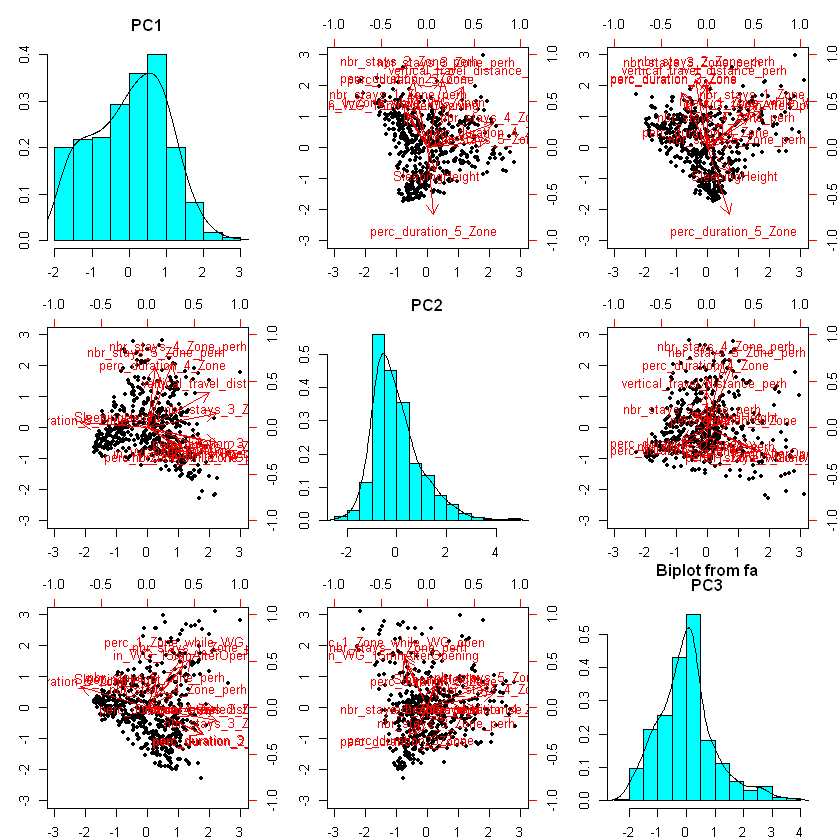

png 
  2

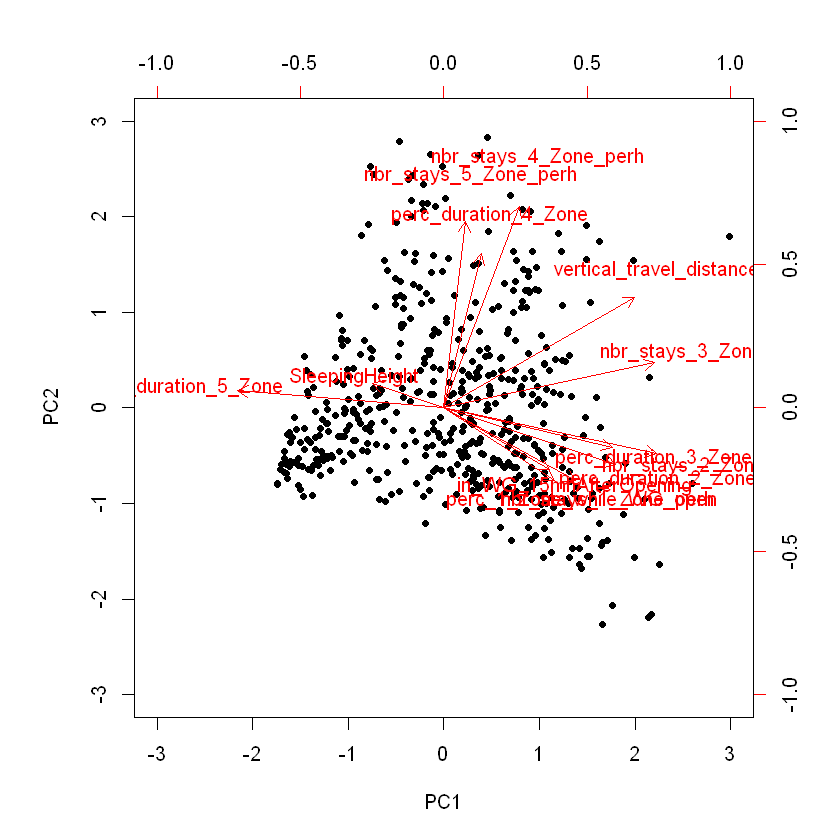

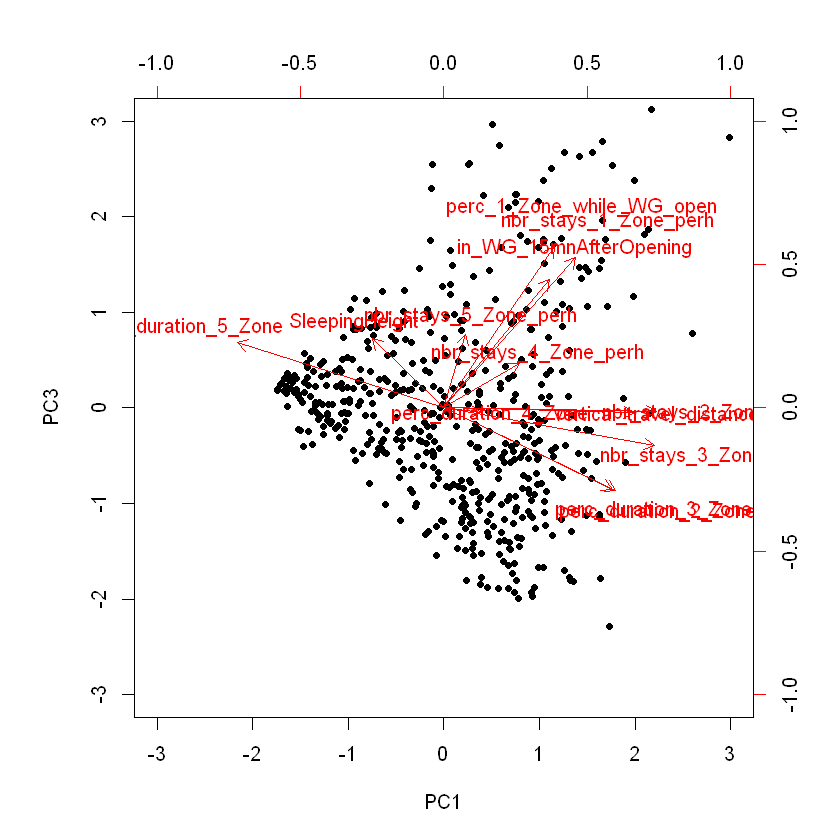

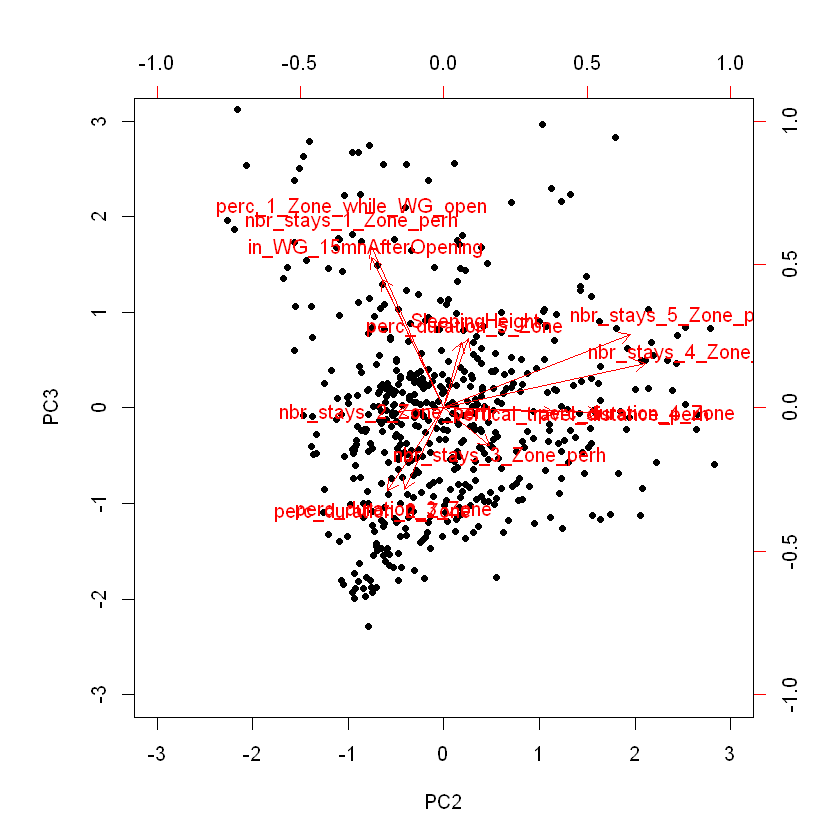

In [5]:
#https://www.rdocumentation.org/packages/psych/versions/2.1.9/topics/principal
#r: a data frame or a correlation matrix, as long as you also specify n.obs.
#covar=FALS by default for now, i.e. correlaiton based PCA. we add here in case it became not by default anymore
res = psych::principal(r=df_pca, rotate="none", nfactors=3, scores=TRUE, covar=FALSE) #not varimax (we want only one PC)
res
#SS-loadings: eigenvalues = sum of squared component loadings across all items for each component
#fit based upon off diagnoal values (a goodness of fit statistic, with values closer to 1 indicating better fit).

#documentation: The beta weights to find the principal components from the data
#res$weights

#eigenvalues of all components --> first one >1
#from https://stats.oarc.ucla.edu/spss/seminars/introduction-to-factor-analysis/a-practical-introduction-to-factor-analysis/:
#represent the total amount of variance that can be explained by a given principal component (if negative: illconditioned model)
#=sum(x^2), x= standardize loadings: i.e Eigenvalues are also the sum of squared component loadings across all items for each 
#component, which represent the amount of variance in each item that can be explained by the principal component. in other words
#for each variable, the square of each loading represents the proportion of variance explained by a particular PC
#: 0.91^2=0.83: 83% of variance of perc_dation_zone_5 is explained by the first component (PC1)
#Eigenvalues close to zero imply there is item multicollinearity, since all the variance can be taken up by the first component.
res$values
#the proportion of total variance explained by each PC:
#prop.table(res$values) #0.41, 0.20,...

#https://www.rdocumentation.org/packages/psych/versions/2.1.6/topics/predict.psych
df_result = data.frame(predict(object=res, data=df[li_pca], old.data=df_pca))
#old.data: "if specified, the data set B will be standardized in terms of values from the old data. 
#This is probably the preferred option. This is done automatically if object is from bestScales"
df$PC1 = df_result$PC1 #varimax: RC, none: PC
head(df,3)

#documentation: https://www.rdocumentation.org/packages/psych/versions/2.0.9/topics/biplot.psych
biplot(res)

biplot(res, choose=c(1,2), main='')

jpeg("PCA.jpg")
biplot(res, choose=c(1,2), main='')
dev.off() 

biplot(res, choose=c(1,3), main='')
biplot(res, choose=c(2,3), main='')

#the first PC explains 41% of the total variation

In [6]:
write.csv(df, file.path(path_adapt,'df_MVT_4individuality_withPCA.csv'), row.names = FALSE)

In [7]:
#for validity compare with the one run on full dataset
res_validity = psych::principal(r=df[li_pca], rotate="none", nfactors=3, scores=TRUE) #varimax if we want more, none for only one
res_validity

Principal Components Analysis
Call: psych::principal(r = df[li_pca], nfactors = 3, rotate = "none", 
    scores = TRUE)
Standardized loadings (pattern matrix) based upon correlation matrix
                                PC1   PC2   PC3   h2    u2 com
perc_duration_5_Zone          -0.91  0.13  0.22 0.90 0.103 1.2
perc_duration_3_Zone           0.74 -0.23 -0.30 0.68 0.320 1.5
perc_duration_2_Zone           0.76 -0.25 -0.34 0.76 0.243 1.6
perc_duration_4_Zone           0.12  0.69 -0.01 0.49 0.511 1.1
nbr_stays_2_Zone_perh          0.92 -0.18  0.01 0.88 0.121 1.1
nbr_stays_3_Zone_perh          0.91  0.22 -0.18 0.91 0.093 1.2
nbr_stays_5_Zone_perh          0.04  0.85  0.28 0.81 0.195 1.2
nbr_stays_4_Zone_perh          0.27  0.90  0.13 0.90 0.099 1.2
SleepingHeight                -0.35  0.09  0.25 0.19 0.809 2.0
vertical_travel_distance_perh  0.81  0.51 -0.04 0.92 0.081 1.7
in_WG_15mnAfterOpening         0.39 -0.21  0.63 0.60 0.401 1.9
perc_1_Zone_while_WG_open      0.40 -0.25  0.77 0.81 0.

In [8]:
head(df, 3)

,HenID,DIB,CLASS,PenID,temperature_C_avg,tobeusedPCA,InitialWeight,Treatment,perc_duration_5_Zone,perc_duration_4_Zone,...,nbr_stays_5_Zone_perh,nbr_stays_1_Zone_perh,in_WG_15mnAfterOpening,SleepingHeight,vertical_travel_distance_perh,DIB_startat11,avgDIB,severity,Feathers,PC1
,<fct>,<int>,<fct>,<fct>,<dbl>,<int>,<dbl>,<fct>,<dbl>,<dbl>,...,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>
1,hen_134,11,MEXP,pen10,11.50000,1,1112,TRAN,100,0,...,0.1,0,0,3,0.0,0,22.35714,34,73,-1.738433
2,hen_134,12,MEXP,pen10,10.16667,0,1112,TRAN,86,0,...,0.2,0,0,3,0.6,1,22.35714,34,73,-1.455477
3,hen_134,13,MEXP,pen10,9.00000,0,1112,TRAN,100,0,...,0.1,0,0,3,0.0,2,22.35714,34,73,-1.738433


# verify reference

In [9]:
# We calculated loadings for each variable on a given principal component by using the correlations between each original 
#variable and the components (Jollife & Cadima, 2016). 
df_result_ = data.frame(predict(object=res, data=df_pca[li_pca]))
#old.data: "if specified, the data set B will be standardized in terms of values from the old data. 
#This is probably the preferred option. This is done automatically if object is from bestScales"
df_pca$PC1 = df_result_$PC1 #varimax: RC, none: PC
head(df_pca,3)

,perc_duration_5_Zone,perc_duration_3_Zone,perc_duration_2_Zone,perc_duration_4_Zone,nbr_stays_2_Zone_perh,nbr_stays_3_Zone_perh,nbr_stays_5_Zone_perh,nbr_stays_4_Zone_perh,SleepingHeight,vertical_travel_distance_perh,in_WG_15mnAfterOpening,perc_1_Zone_while_WG_open,nbr_stays_1_Zone_perh,PC1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,100,0,0,0,0.0000000,0.000000,0.1,0.000000,3,0.000000,0,0.000000,0.0000000,-1.73843305
4,88,2,10,1,0.1000000,0.100000,0.2,0.100000,3,0.600000,0,0.000000,0.0000000,-1.47624661
10,60,10,15,14,0.5454545,1.272727,1.0,1.636364,3,4.545455,1,1.014706,0.1764706,-0.01623052


In [10]:
cor(df_pca$SleepingHeight, df_pca$PC1)

[1] -0.3127357